In [ ]:
# Assignment
# 1. create shape in external drawing apps.
# 2. Write a code to identify your shapes
# write a code to sort your shapes

detected contours: '12' 
contour: (102, 1, 2) , size:  ((612.0, 310.0), (30.0, 32.0), 0.0)
contour: (190, 1, 2) , size:  ((83.0, 240.5), (49.50718688964844, 45.1307373046875), 47.81555938720703)
contour: (509, 1, 2) , size:  ((516.5, 260.0), (146.0, 217.0), 90.0)
contour: (488, 1, 2) , size:  ((517.0, 147.0), (72.0, 208.0), 90.0)
contour: (1015, 1, 2) , size:  ((272.44384765625, 223.5457763671875), (203.70138549804688, 291.95086669921875), 82.58308410644531)
contour: (494, 1, 2) , size:  ((235.0, 147.0), (74.0, 210.0), 90.0)
contour: (462, 1, 2) , size:  ((530.263427734375, 107.40740203857422), (68.3394775390625, 219.7953643798828), 73.81079864501953)
contour: (458, 1, 2) , size:  ((220.51377868652344, 107.04586029052734), (69.92132568359375, 218.0012664794922), 73.3007583618164)
contour: (181, 1, 2) , size:  ((372.5, 75.5), (65.0, 63.0), 90.0)
contour: (138, 1, 2) , size:  ((695.4881591796875, 52.01130676269531), (33.899070739746094, 35.41154098510742), 46.332218170166016)
contour: (1

Text(0.5, 1.0, 'minEnclosingCircle')

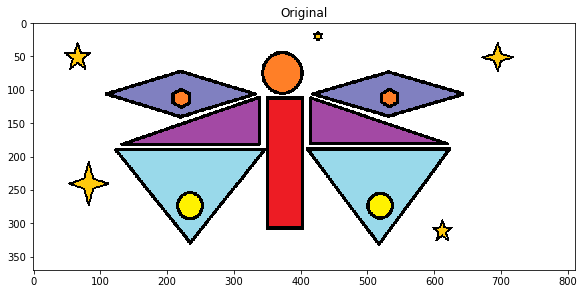

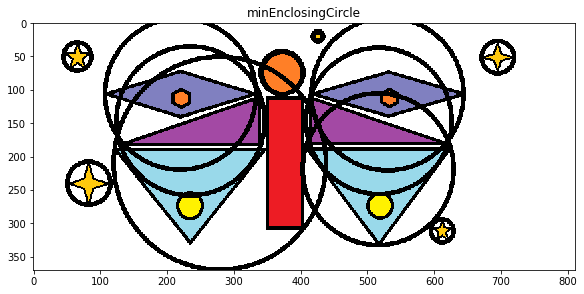

In [60]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert it to grayscale:
img = cv.imread(r'C:\Users\user\Desktop\cv-master\essential\assets\butterfly1.png')
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))

imgRGB = img[:, :, ::-1]
plt.subplot(2,1,1)
plt.imshow(imgRGB)
plt.title('Original')

# Apply cv2.threshold() to get a binary image:
ret, threshImg = cv.threshold(imgGray, 250, 255, cv.THRESH_BINARY_INV)

# Find contours using the thresholded image:
# Note: cv2.findContours() has been changed to return only the contours and the hierarchy
contours, hierarchy = cv.findContours(threshImg, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# Show the number of detected contours:
print("detected contours: '{}' ".format(len(contours)))
for contour in contours:
    print('contour:', contour.shape, ', size: ', cv.minAreaRect(contour))

# Create copy of the original image to perform the visualization of each operation:

imgMinEnclosingCircle = img.copy()

# minEnclosingCircle():
for contour in contours:
    (x, y), radius = cv.minEnclosingCircle(contour)
    center = (int(x), int(y))
    radius = int(radius)
    cv.circle(imgMinEnclosingCircle, center, radius, (0, 0, 0), 5)

plt.figure(figsize=(10,10))

# BGR to RGB
imgRGB = imgMinEnclosingCircle[:, :, ::-1]
plt.subplot(2,1,1)
plt.imshow(imgRGB)
plt.title('minEnclosingCircle')


detected contours: 12


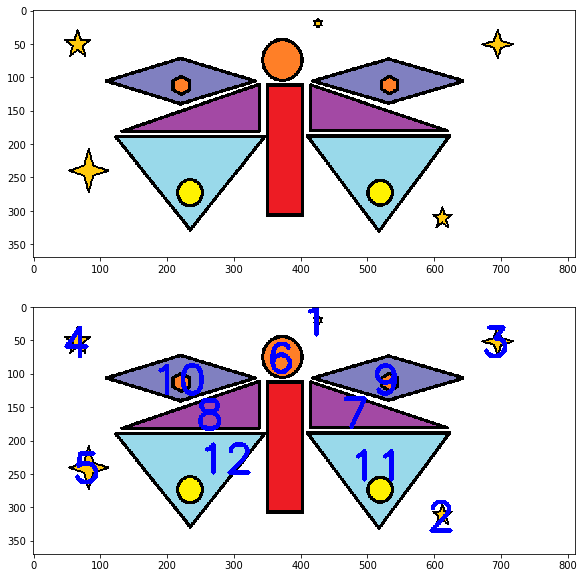

In [61]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert it to grayscale:
img = cv.imread(r'C:\Users\user\Desktop\cv-master\essential\assets\butterfly1.png')
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply thresholding to get a binary image:
ret, threshImg = cv.threshold(imgGray, 150, 255, cv.THRESH_BINARY_INV)

# Find contours using the thresholded image:
contours, hierarchy = cv.findContours(threshImg, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# number of detected contours:
print(f"detected contours: {len(contours)}")

# create list of tuple (size, shape) for each contour
# list of contour size
contours_sizes = [cv.contourArea(contour) for contour in contours]
# list of (size, contour)
size_shape_list = zip(contours_sizes, contours)
sorted_size_shape_list = sorted(size_shape_list)
# (contour_sizes, contours) = zip(*sorted_size_shape_list)

plt.figure(figsize=(10,10))

# BGR to RGB
imgRGB = img[:,:,::-1]
plt.subplot(211)
plt.imshow(imgRGB)

for i, (size, contour) in enumerate(sorted_size_shape_list):
    # Compute the moment of contour:
    M = cv.moments(contour)

    # The center or centroid can be calculated as follows:
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])

    # Get the position to draw:    
    text = str(i + 1)
    fontFace = cv.FONT_HERSHEY_SIMPLEX
    fontScale = 2
    thickness = 5
    text_size = cv.getTextSize(text, fontFace, fontScale, thickness)[0]

    text_x = cX - text_size[0] / 2
    text_x = round(text_x)
    text_y = cY + text_size[1] / 2
    text_y = round(text_y)
    
    # Write the ordering of the shape on the center of shapes
    color = (255, 0, 0)
    cv.putText(img, text, (text_x, text_y), fontFace, fontScale, color, thickness)

# BGR to RGB
imgRGB = img[:,:,::-1]
plt.subplot(212)
plt.imshow(imgRGB)

plt.show()

detected contours: 12
contour: (10, 1, 2) (10, 2)
contour: (8, 1, 2) (8, 2)
contour: (3, 1, 2) (3, 2)
contour: (3, 1, 2) (3, 2)
contour: (8, 1, 2) (8, 2)
contour: (3, 1, 2) (3, 2)
contour: (4, 1, 2) (4, 2)
3.2253521126760565
contour: (4, 1, 2) (4, 2)
3.1232876712328768
contour: (8, 1, 2) (8, 2)
contour: (8, 1, 2) (8, 2)
contour: (10, 1, 2) (10, 2)
contour: (8, 1, 2) (8, 2)


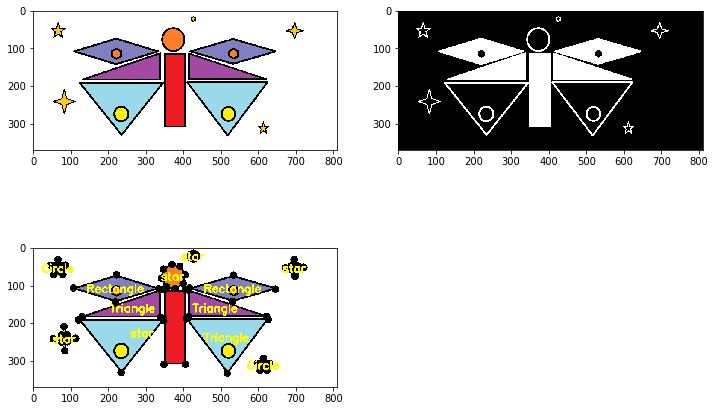

In [65]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert it to grayscale:
img = cv.imread(r'C:\Users\user\Desktop\cv-master\essential\assets\butterfly1.png')
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(12,8))

# BGR to RGB
imgRGB = img[:,:,::-1]
plt.subplot(221)
plt.imshow(imgRGB)

# Apply thresholding to get a binary image:
ret, threshImg = cv.threshold(imgGray, 150, 255, cv.THRESH_BINARY_INV)

# gray to RGB
imgRGB = cv.cvtColor(threshImg, cv.COLOR_GRAY2RGB)
plt.subplot(222)
plt.imshow(imgRGB)

# Find contours using the thresholded image:
contours, hierarchy = cv.findContours(threshImg, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# number of detected contours:
print(f"detected contours: {len(contours)}")

# approxPolyDP():
imgApproxPolyDP = img.copy()
for contour in contours:
    perimeter = cv.arcLength(contour, True)
    epsilon = 0.03 * perimeter
    approxPolyDP = cv.approxPolyDP(contour, epsilon, True)

    
    color = (0, 255, 255)
    thickness = 5
    # draw line
    for approx in approxPolyDP:
        cv.drawContours(imgApproxPolyDP, [approx], 0, color, thickness)
    color = (0, 0, 0)
    thickness = 5
    # draw points
    for approx in [approxPolyDP]:
        # draw points
        squeeze = np.squeeze(approx)
        print('contour:',approx.shape, squeeze.shape)
        for p in squeeze:
            pp = tuple(p.reshape(1, -1)[0])
            cv.circle(imgApproxPolyDP, pp, 10, color, -1)


    # determine shape   
    verticeNumber = len(approxPolyDP)
    if verticeNumber == 3:
        vertice_shape = (verticeNumber, 'Triangle')
    elif verticeNumber == 4:
        # get aspect ratio
        x, y, width, height = cv.boundingRect(approxPolyDP)
        aspectRatio = float(width) / height
        print(aspectRatio)
        if 0.90 < aspectRatio < 1.1: 
            vertice_shape = (verticeNumber, 'Square')
        else:
            vertice_shape = (verticeNumber, 'Rectangle')
    elif verticeNumber == 5:
        vertice_shape = (verticeNumber, 'Pentagon')
    elif verticeNumber == 6:
        vertice_shape = (verticeNumber, 'Hexagon')
    elif verticeNumber == 8:
        vertice_shape = (verticeNumber, 'star')
    else:
        vertice_shape = (verticeNumber, 'Circle')
    
    # write shape
    # Compute the moment of contour:
    M = cv.moments(contour)

    # The center or centroid can be calculated as follows:
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])

    # Get the position to draw:    
    text = vertice_shape[1]
    fontFace = cv.FONT_HERSHEY_SIMPLEX
    fontScale = 1
    thickness = 3
    text_size = cv.getTextSize(text, fontFace, fontScale, thickness)[0]

    text_x = cX - text_size[0] / 2
    text_x = round(text_x)
    text_y = cY + text_size[1] / 2
    text_y = round(text_y)
    
    # Write the ordering of the shape on the center of shapes
    color = (0, 255, 255)
    cv.putText(imgApproxPolyDP, text, (text_x, text_y), fontFace, fontScale, color, thickness)




# BGR to RGB
imgRGB = imgApproxPolyDP[:,:,::-1]
plt.subplot(223)
plt.imshow(imgRGB)

plt.show()